# About Dataset

Recycling trash is a crucial part of protecting our environment. Garbage must be divided into categories with similar recycling processes in order to enable the recycling process. The percentage of recycled waste can rise considerably if it is possible to separate domestic trash into several categories. Using the classes given, we will train the model in this notebook to categorize the input images and output the trash classification.

The six classification included in the **Garbage Classification Dataset** are: 
1.   cardboard (393) 
2.   glass (491)
3.   metal (400)
4.   paper(584)
5.   plastic (472)
6.   trash(127)
<br> 

The objective is to train the model to be able to predict the input images based on the provided classifications.

**Step 1** : load the libraries using the import libraries

Data Pre-Processing <br><br>
This section is the part wherein the data will be loaded & preprocessed into its needed variables and analyzed with its attributes to better understand the data and how it can be utilized by the different libraries that we will be importing in this section of the notebook. The first thing that we could notice would be the inclusion of the imports of the needed libraries from the ones that will be used to handle data and from the ones that would be used to handle the models that would then handle the data. The rest of the libraries that I would be importing for this notebook would be libaries concerning score and model evaluation that would be needed for the further calibration of the models that I will be using.

1. ``import tensorflow as tf`` - - Tensorflow is imported as *tf*. It automates data collection, tracks models, monitors performance, and retains models using best practices. It is a multiple-machine learning library that is open-sourced and can be used end-to-end.

2. ``from tensorflow import keras`` - It is a high-level neural library that runs on TensorFlow. Similar to TensorFlow, Keras provides APIs to build and train models. It has a Python built-in that makes it more user-friendly.

3. ``from tensorflow.keras.models import Sequential`` - The input_shape argument is used to help define the layers that will be in the network as the function executes and creates each layer.  

4. ``from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D`` - A ``dense`` layer is used when any features can be associated with any other featuree in a data point. If nearby associations among features are important, such as when detecting objects, these ``conv`` layer are important. for classfying or detecting,neighboorhoods matter. Pixels at the opposite corners can be helpful. A ``flatten`` layer is used when you need to linearize a multidimensional output to pass it into a dense layer. ``Dropouts`` reduce too mmuch association between features by dropping weights.


5. ``from tensorflow.keras.preprocessing.image import ImageDataGenerator`` - In image augmentation, different transformmmation are applied to original images to create mmultiple tranformed copies. Using the Keras ``ImageDataGenerator``class, yit can easily enhance the immages using a variety of techniques such as rotation, standardization, shifts, brightness, flips, and more. 

6. ``from PIL import Image`` - with PIL. you can open, manipulate, and save a wide range of image file formmmats using the Python programmming language. It is a free, open-source library that supports many different image formats.

7. ``from pathlib import Path`` - Path is one of the most important classes provided by the pathlib module. It represents a path to a directory or file on our computer's file system. 

8. ``import os`` - It allows to create and remove directories, fetch contenst, change the current directory, and more. Importing OS module is the first step in interacting with the underlying operating system.

9. ``import numpy as np`` - NumPy is imported as *np*. It is a general-purpose package for handling arrays. It is the core package for using Python in scientific computing. `` -

10. ``import matplotlib.pyplot as plt`` - Pyplot is imported as *plt*. The Matplotlib library provides graphical plotting capabilities and data visualization in Pythion and NumPy, Their numerical extension. 

10. ``from torchvision.datasets import ImageFolder`` - Deep learning model uses ImageFolder class to load images from our train and val folders into a PyThorch dataset. 

10. ``import torchvision.transforms as T`` - it allows to change brightness, contrast, saturation, and hu of an image randomly. Also, cropping the image with four corners and acentral crop. lastly, converting the image to grayscale.

5. ``print ("Done with declaration. Current version of Tenserflow :", tf.__version__)`` - It allows to print <b>*Done with the library declaration. Current version of Tenserflow is 2.8.2* </b>

In [1]:
import tensorflow as tf
#import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.10.1


**Step 2** : Load and transform data. 

1. ``data_dir = Path('Garbage')`` - Data directories identify master sources of data as as replicas of the data in a distrbuted database. In this case, the path will be ***Garbage***.

2. ``transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])`` - It allows to resize the imagee to 32 x 32 pixels and the ToTensor converts preprocessed images into Neural Networks. 

3. ``dataset = ImageFolder(data_dir, transform = transformer)`` - Assigned the transform images to the dataset. The ImageFolder class to allows to load the images from our train and val folders into a PyThorch dataset.

4. ``print(dataset.classes)`` - It allows to print the classes in the dataset. Classes: ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

In [2]:
# collect directory
data_dir = Path('Garbage\original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


**Step 3** : Plot and inspect the classes in the data. 


1. ``fig = plt.figure()`` - function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure(). 

2. ``ax = fig.add_axes([0,0,1,1])`` - It allows to plot the data for the classes. The dimension is set to ***0,0,1,1*** the first two array **0,0** are the horizontal and vertical coordinate of the lower left corner. The ***1,1*** are the width and height of the subplot.

3. ``counts = [393,491,400]`` - It is used to set the total counts of each class in the database. in this case we have six classes.

4. ``ax.bar(dataset.classes,counts)`` - It is used for bar plot. the range of classes can be shown here in a barplot

5. ``plt.title('Class Distribution')`` - It allows to set a title ***Class Distribution*** for the figure. It can be found on the upper side. 

6. ``plt.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. In this case, the total counts of all classes in the dataset will be displayed. It also helps to visualize more easily.

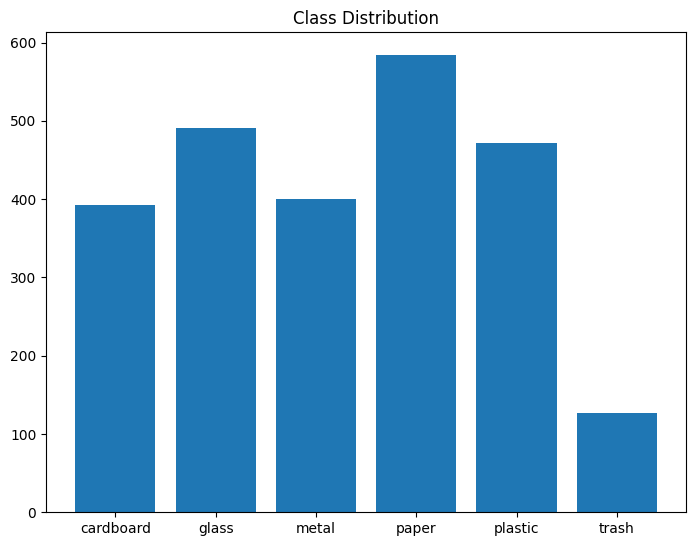

In [3]:
# display class distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

**Step 4** : Split and store the data into train and test data. 

1. ``PATH_TRAIN = r"Garbage\original_images"`` - The train data used will come from garbage file images.
2. ``PATH_TEST = r"Garbage\processed_images"`` - The test data used will come from processed images. 
3. ``class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']`` - Will set all the classes in the class_names so that every time it is called it will return specific classes in the dataset

4. ``imagepath_cardboard = r"Garbage\original_images\cardboard"`` - The cardboard class is assigned to imagepath_cardboard.
5. ``graypath_cardboard = r"Garbage\processed_images\cardboard"`` - The processed image of cardboard class is assigned to graypath_cardboard.

6. ``File_listing = os.listdir(imagepath_cardboard)`` <br>
  ``for file in File_listing:`` - The os module provides a function which lists all the files in the specified path using the names provided by the fuction. In this case the specified is ***imagepath_cardboard***. With the use ``im.resize and img.convert`` functio, the cardboard images is resize by 32 x 32 pixels and in grayscale. 




In [4]:
PATH_TEST = r"Garbage\original_images"
PATH_TRAIN = r"Garbage\processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [5]:
imagepath_cardboard = r"Garbage\original_images\cardboard"
graypath_cardboard = r"Garbage\processed_images\cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '\\' + file, "JPEG")

In [6]:
imagepath_glass = r"Garbage\original_images\glass"
graypath_glass = r"Garbage\processed_images\glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '\\' + file, "JPEG")

In [7]:
imagepath_metal = r"Garbage\original_images\metal"
graypath_metal = r"Garbage\processed_images\metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '\\' + file, "JPEG")

In [8]:
imagepath_paper = r"Garbage\original_images\paper"
graypath_paper = r"Garbage\processed_images\paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '\\' + file, "JPEG")

In [9]:
imagepath_plastic = r"Garbage\original_images\plastic"
graypath_plastic = r"Garbage\processed_images\plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '\\' + file, "JPEG")

In [10]:
imagepath_trash = r"Garbage\original_images\trash"
graypath_trash = r"Garbage\processed_images\trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '\\' + file, "JPEG")

1. ``train_dir = os.path.join(PATH_TRAIN)`` <br>
``test_dir = os.path.join(PATH_TEST)`` <br> 
- The dataset is divided into two groups: the train data and the test data. The train data is where we teach the machine learning algorithm to predict specific images, while the test data is where we validate the algorithm's progress.

In [11]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

1. ``os.path.join`` - is a Python submodule of OS used for common pathname manipulation and provides a portable way o levergae operating system dependent functionality. In this case, we will use it in every class that our dataset has. for example, the ***imagepath_cardboard*** will intelligently join the path components which is the ***imagepath_cardboard_dir***.

In [12]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

1. ``len(os.listdir(PATH_TRAIN))`` - it allows to display the list of file in the  ***PATH_TRAIN***. It returns the total count of the list in the specified path. 

In [13]:
len(os.listdir(PATH_TRAIN))

6

1. ``IMG_HEIGHT = 32`` <br>
``IMG_WIDTH = 32`` <br>

In [14]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

1. ``image_gen = ImageDataGenerator(rescale=1./255)`` - Using the Keras ImageDataGeneratorclass, it can easily transform the image to range from range ***0,255*** to ***0,1***

In [15]:
image_gen = ImageDataGenerator(rescale=1./255)

1. the train folder contain a single folder inside which all the train images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [16]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


1. Same as above, the test folder contain a single folder inside which all the test images are present. Here are the most commonly used attributes along with the ``flow_from_directory()`` method. The ``directory`` where the classes of folders are present. We set the shuffle to ***true*** to shuffle the order of the images. The ``target_size``which we set the input image to ***32 x 32*** pixels. lastly, the ``class_mode`` where we set to ***categorical*** because we have more than two classes in the dataset.

In [17]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


1.  The ``plotImages`` function is to create a figure object. When the figure's size needs to be tweaked and more than one axes object needs to be added to a figure, we must explicity use plt.figure(). This ``(figsize=(20,20))`` function allows to set the size of the figure, In this case the figure is set by ***20:20*** ratio. Also, The ``ax.imshow`` display the image in 2D regualr raster. The ``axes.flatten()`` it returns the flattened version of the array. The ``plt.show()`` is the pyplot allows all sets figures to be displayed. 

**Step 5** : Display and examine the images from the dataset.

In [18]:
#plt.figure()
#plt.imshow(sample_training_images[0])
#plt.show()
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _ = next(sample_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,4, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 2527 images belonging to 6 classes.


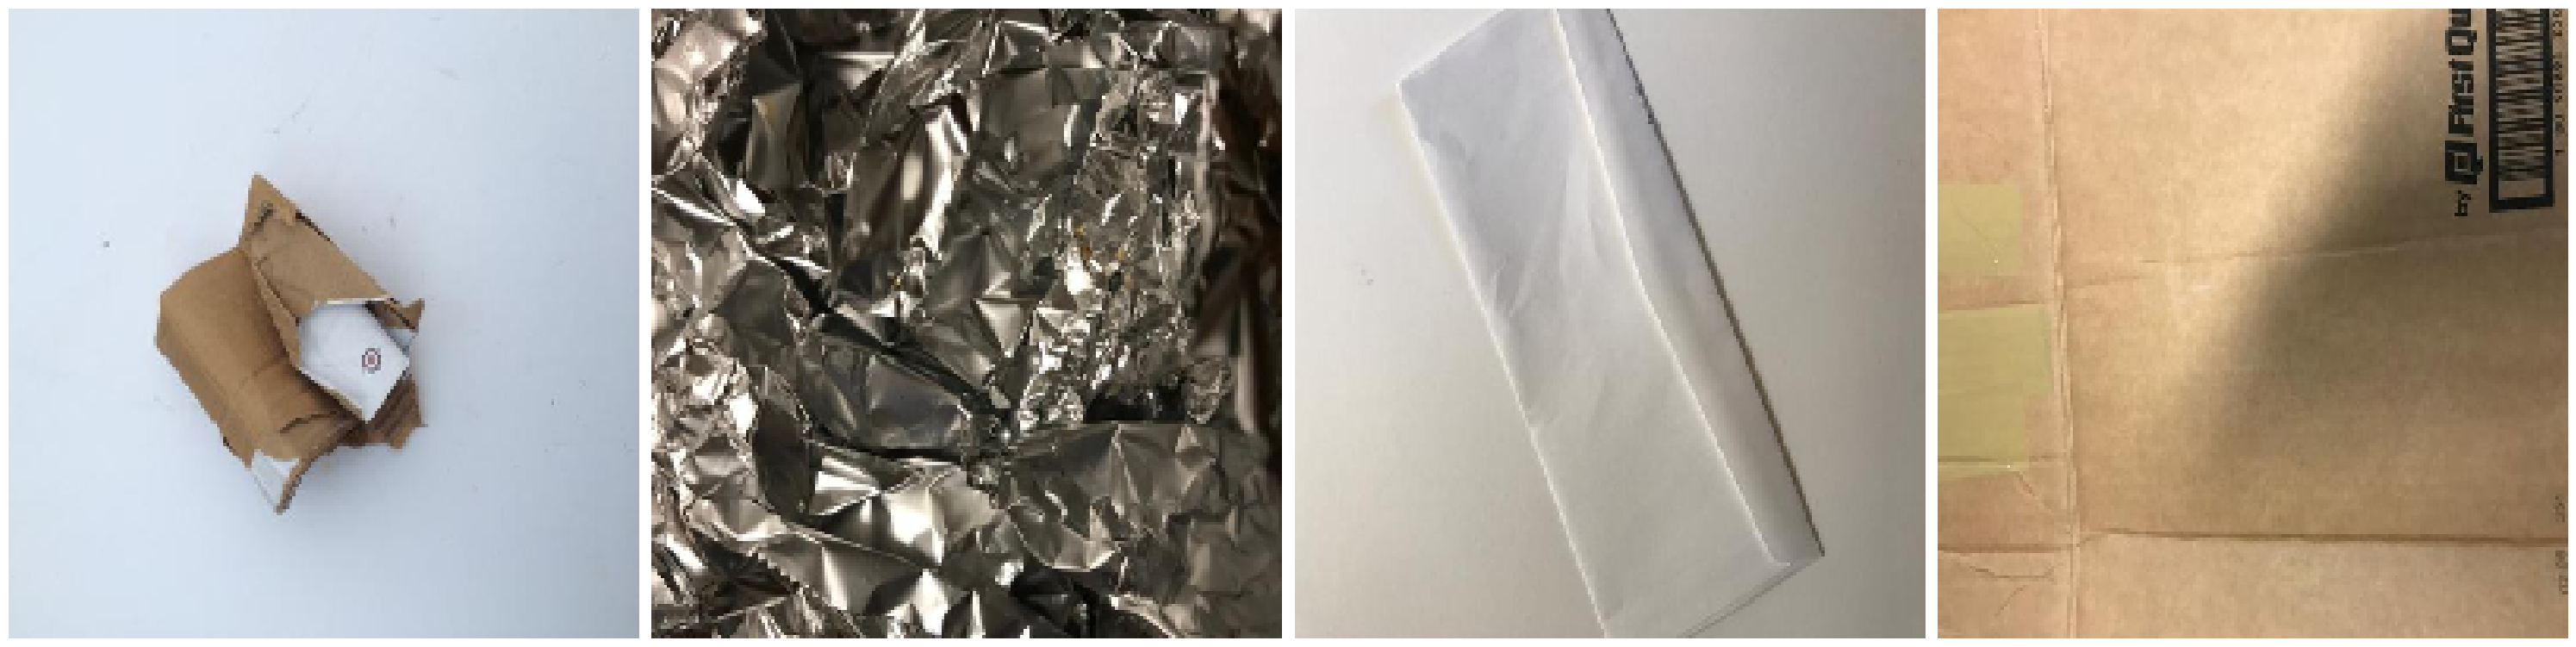

In [19]:
plotImages(sample_training_images[:4])

**Step 6** : Builing theee the Neural Network by using the Sequentil API

1. ``model = Sequential()`` -  It is a model to use when there is only one input and one output on the data you need to show. It is not appropriate to use this model if you have multiple inputs and outputs. It helps you train and infer conclusions from your model. the ``input_shape=(28,28)`` represent the resolution of the image: ***32 x 32*** pixels. ``Dense`` It creates a new dense layer and returns the necessary output data for your model to use. Activation is the element-wise activation function used to pass through the activation arguments,  relu is the rectified linear unit activation function, and Sigmoid is equivalent to a 2-element Softmax, where the second element is taken to be zero.

In [20]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

**Step 7** : Defining an optimizer, a loss function, and other useful training parameters.

In [21]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

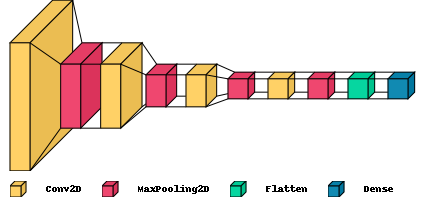

In [22]:
import visualkeras
visualkeras.layered_view(model, legend=True, spacing=20)

**Step 8** : Training the model by using the train dataset.

1. The os module provides a function which lists all the files in the specified path using the names provided by the fuction. for example, ***imagepath_cardboard_dir*** with the num_cardboard_train.

2. ``total_train = num_cardboard_train + num_glass_train + num_metal_train`` - total number of train set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

3. ``total_test = num_cardboard_test + num_glass_test + num_metal_test`` - total number of test set for ***cardboard***, ***glass***, ***metal***, ***paper***, ***plastic***, and ***trash***.

In [23]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

1. In this model the number of epochs is set to 60 this number represent the number of times the training set to run. A model that is well-fit produces more accurate results, as it generalizes to similar data to that on which it was trained. ``validation_data`` Data on which to evaluate the loss and any model metrics at the end of each epoch. ``validation_steps`` Only relevant if validation_data is provided and is a tf. data dataset. Total number of steps to draw before stopping when performing validation at the end of every epoch.

In [24]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

Epoch 1/60
52/52 [==============================] - 14s 229ms/step - loss: 1.7388 - accuracy: 0.2260 - val_loss: 1.7078 - val_accuracy: 0.2383
Epoch 2/60
52/52 [==============================] - 3s 50ms/step - loss: 1.7056 - accuracy: 0.2375 - val_loss: 1.6606 - val_accuracy: 0.2550
Epoch 3/60
52/52 [==============================] - 2s 40ms/step - loss: 1.6196 - accuracy: 0.3203 - val_loss: 1.5580 - val_accuracy: 0.3521
Epoch 4/60
52/52 [==============================] - 2s 41ms/step - loss: 1.5320 - accuracy: 0.3560 - val_loss: 1.5178 - val_accuracy: 0.3633
Epoch 5/60
52/52 [==============================] - 2s 45ms/step - loss: 1.5036 - accuracy: 0.3933 - val_loss: 1.5193 - val_accuracy: 0.4185
Epoch 6/60
52/52 [==============================] - 2s 42ms/step - loss: 1.4351 - accuracy: 0.4105 - val_loss: 1.4135 - val_accuracy: 0.4247
Epoch 7/60
52/52 [==============================] - 2s 40ms/step - loss: 1.3832 - accuracy: 0.4402 - val_loss: 1.3721 - val_accuracy: 0.4492
Epoch 8/60


**Step 9** : Evaluating the performance of the model using the test dataset.

In [25]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

79/79 [==============================] - 3s 38ms/step - loss: 0.6238 - accuracy: 0.8093
Test accuracy: 80.92600107192993 Test Loss: 0.6237830519676208 


1. ``import plotly.graph_objects as goimport plotly.graph_objects as go `` - IT contains a automatically-generated hierarchy of Python classes that represent non-leaf nodes in this figure schema. 

2. ``fig = go.Figure()`` - is a Python package for creating, manipulation, nad rendering graphocal figures. Graphs are represented by figures, which are data structure. 


5. ``fig.show()`` - is the pyplot module of the matplotlob library, this function allows all figures to be displayed. It also helps to visualize more easily.

Below shows the evaluation of the model. It shows the accuracy and losses for training as the number of epoch increases. This model achieved the high overall 92% accuracy with the Adam optimizer and has 60 number of epoch. 

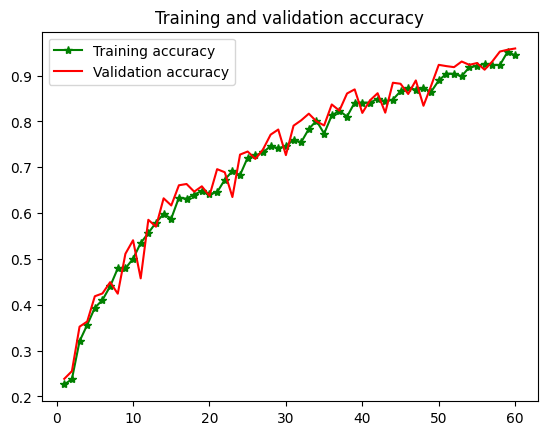

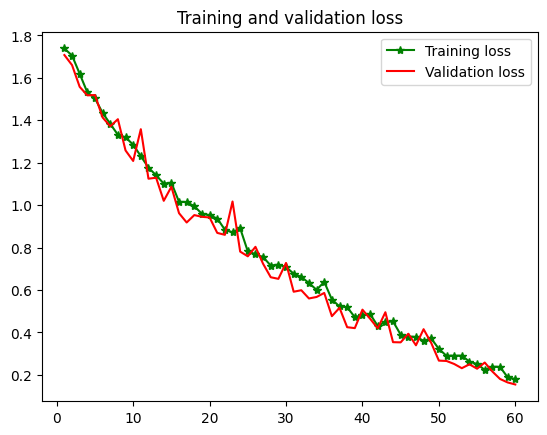

In [26]:
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Below shows that the CNN successfully classifies majority of all different household garbage. However, there is a great probability to some classes that the model may mistake garbage with glass and metal, or paper and glass.

79/79 [==============================] - 3s 36ms/step


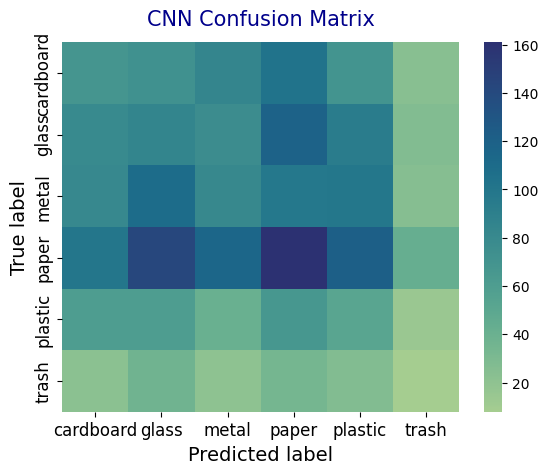

Classification Report
              precision    recall  f1-score   support

   cardboard       0.15      0.15      0.15       403
       glass       0.18      0.17      0.17       501
       metal       0.20      0.24      0.22       410
       paper       0.21      0.25      0.23       594
     plastic       0.23      0.14      0.17       482
       trash       0.06      0.07      0.06       137

    accuracy                           0.19      2527
   macro avg       0.17      0.17      0.17      2527
weighted avg       0.19      0.19      0.18      2527



In [27]:
#Confusion Matrix and Classification Report
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

(X,y) = (train_data_gen[0], train_data_gen[1])
y_test = train_test_split(X,y,test_size=0.2, random_state=4)

nb_classes = 6
Y_train = model.predict(train_data_gen)
y_train = np.argmax(Y_train, axis=1)
Y_test = model.predict(test_data_gen)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_train)

#visualize confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_train)), ('cardboard', 'glass', 'metal','paper','plastic','trash'),
                      ('cardboard', 'glass', 'metal','paper','plastic','trash'))

heatmap = sns.heatmap(matrix, annot = False, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)
plt.title('CNN Confusion Matrix', fontsize = 15, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

print('Classification Report')
target_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']
print(classification_report(train_data_gen.classes, y_test, target_names=target_names,zero_division=0))

Below shows the summary accuracy of each class which includes cardboard, glass, metal, paper, plastic, and trash. The accuracy was achieved with highest fine-tuning combinations of 60 epoch, 45 batch size, 0.01 learning rate, and an Adam optimizer

In [28]:
# to identify the accuracy of each class 
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.72378314 0.67550455 0.70280966 0.62683023 0.74040364 0.89157103]


## Display Predictions (Random Images)

In [29]:
from skimage.transform import resize 

In [30]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 [==============================] - 0s 175ms/step


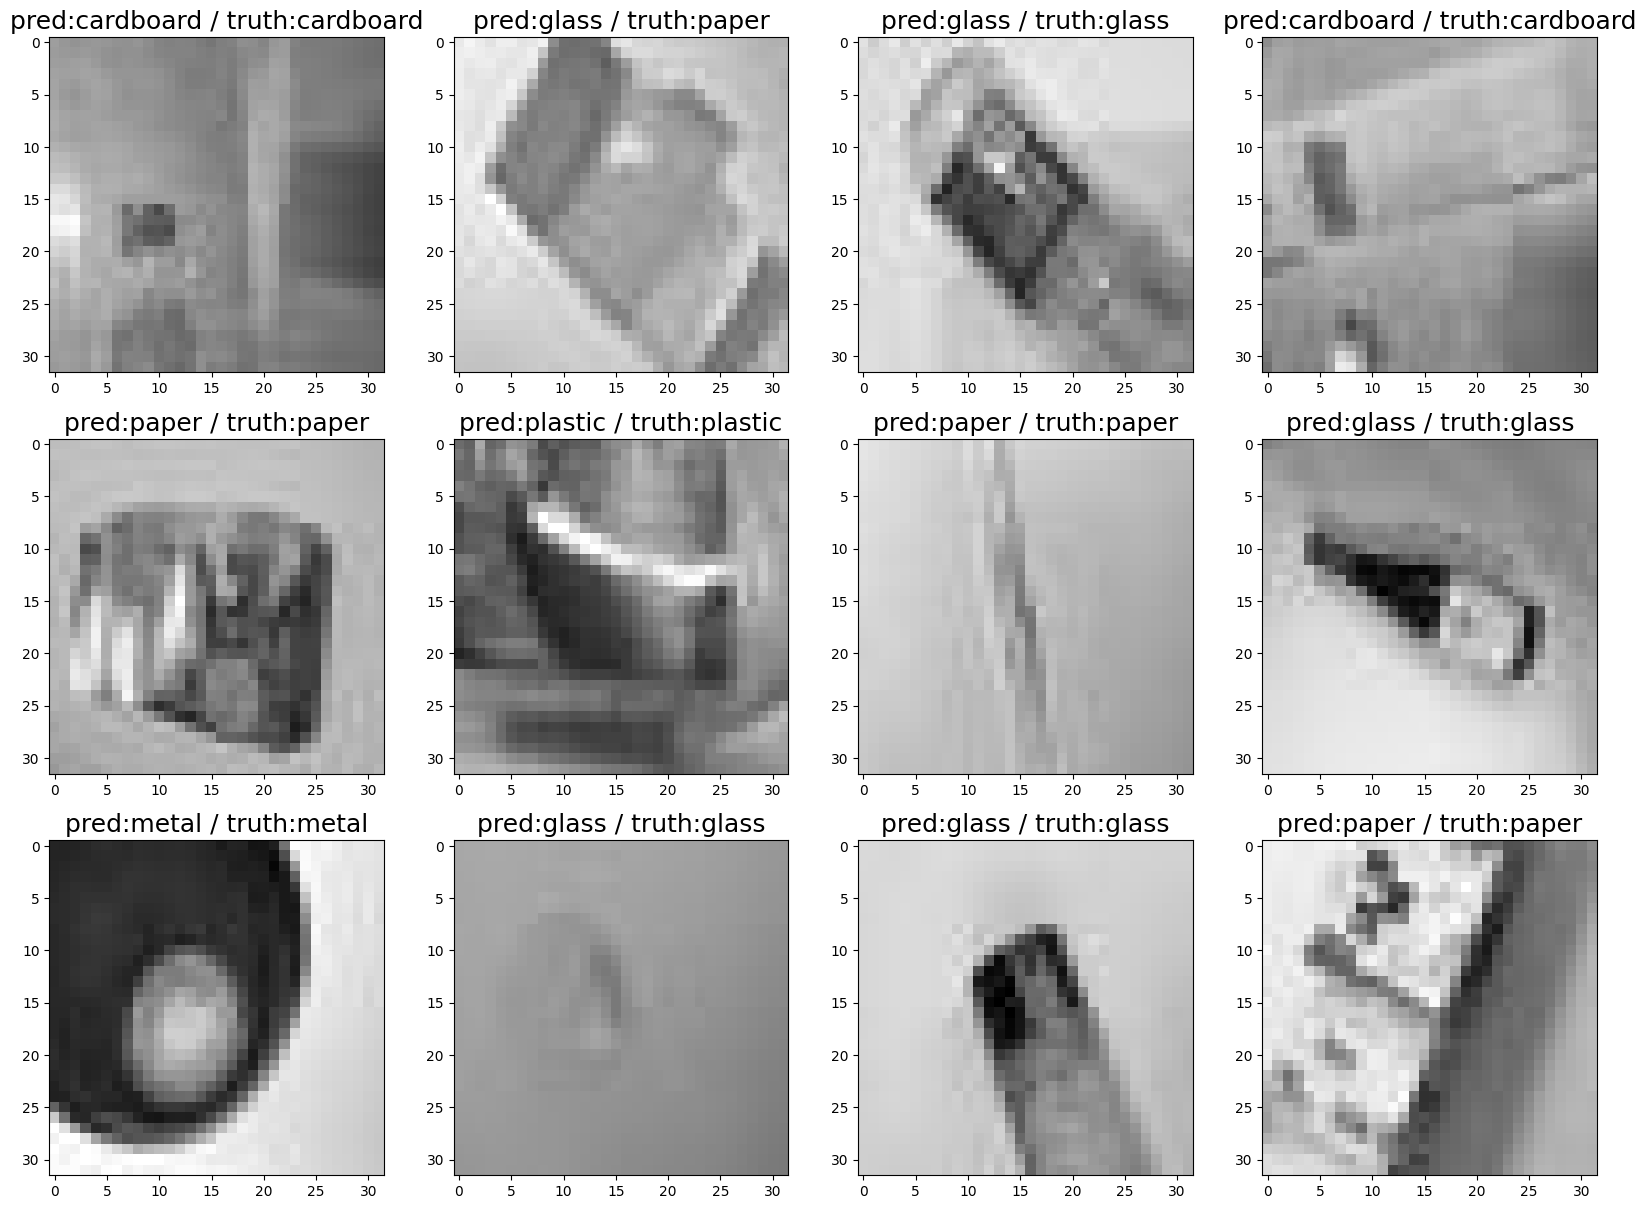

In [31]:
test_x, test_y = train_data_gen.__getitem__(1)
# test_x is used to train the data
# test_y refers to the actual answer of the testing set data
# preds refers to the predicted class
preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])
#shows some testing results

---
### Class: Cardboard

---

1/1 [==============================] - 0s 168ms/step
Probability: 0.9971259
Classified: cardboard 
 cardboard


Text(0.5, 1.0, 'Loaded Image')

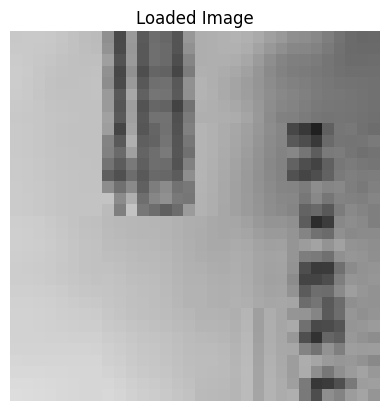

In [32]:
test_img = 'Garbage/processed_images/cardboard/cardboard_321.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n' , number_to_class[np.argmax(test_img[0])])

plt.axis('off')
plt.imshow(img.squeeze())
plt.imshow(img)
plt.title("Loaded Image")

---
### Class: Glass

---

1/1 [==============================] - 0s 22ms/step
Probability: 0.93408984
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

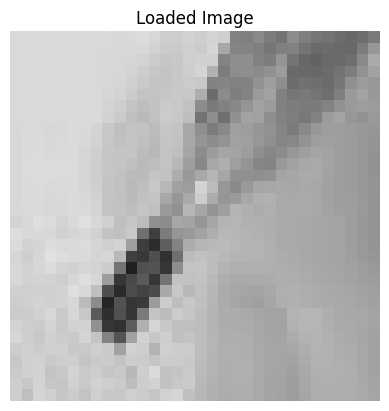

In [ ]:
test_img = 'Garbage/processed_images/glass/glass_341.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Metal
---

1/1 [==============================] - 0s 20ms/step
Probability: 0.9999902
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

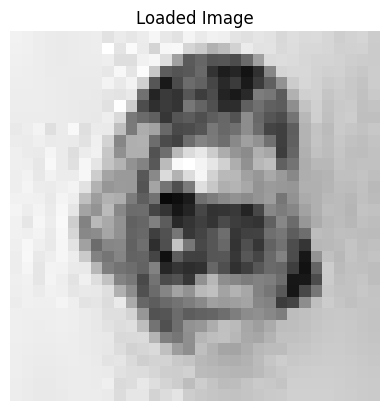

In [ ]:
test_img = 'Garbage/processed_images/metal/metal_100.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Paper

---

1/1 [==============================] - 0s 21ms/step
Probability: 0.9986254
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

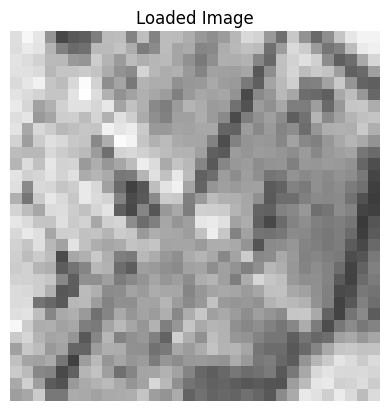

In [ ]:
test_img = 'Garbage/processed_images/paper/paper_324.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Plastic

---

1/1 [==============================] - 0s 21ms/step
Probability: 0.9901855
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

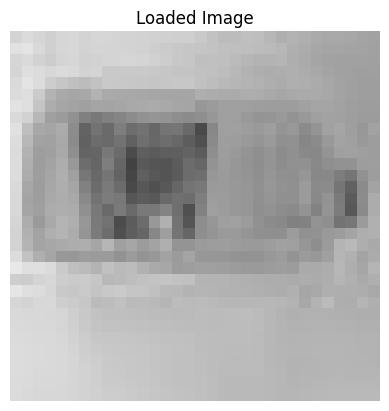

In [ ]:
test_img = 'Garbage/processed_images/plastic/plastic_155.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Trash
---

1/1 [==============================] - 0s 21ms/step
Probability: 0.99283123
Classified: trash 



Text(0.5, 1.0, 'Loaded Image')

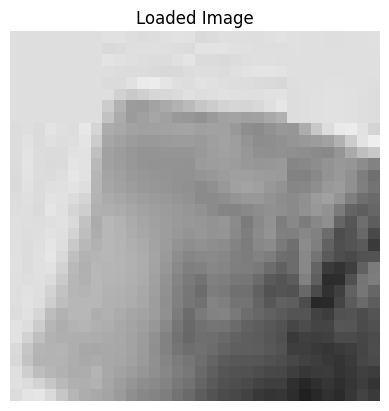

In [ ]:
test_img = 'Garbage/processed_images/trash/trash_032.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")